**Creating Plots for the HP-Tuning (grid search) results - Dataset with and without reasonings**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

1. Dataset with reasoning

In [2]:
# Load the dataset
file_path = "grid_search_results.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

,model_name,learning_rate,batch_size,epochs,weight_decay,eval_loss,train_time,status,save_path
0,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,1,0.01,1.805383,364.296556,Success,trained_models/FineLlama-3.1-8B_instruct_eval_...
1,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,1,0.10,1.845187,372.354603,Success,trained_models/FineLlama-3.1-8B_instruct_eval_...
2,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,3,0.01,1.932233,928.385545,Success,trained_models/FineLlama-3.1-8B_instruct_eval_...
3,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,3,0.10,1.967015,936.825832,Success,trained_models/FineLlama-3.1-8B_instruct_eval_...
4,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,5,0.01,2.018647,1489.182978,Success,trained_models/FineLlama-3.1-8B_instruct_eval_...


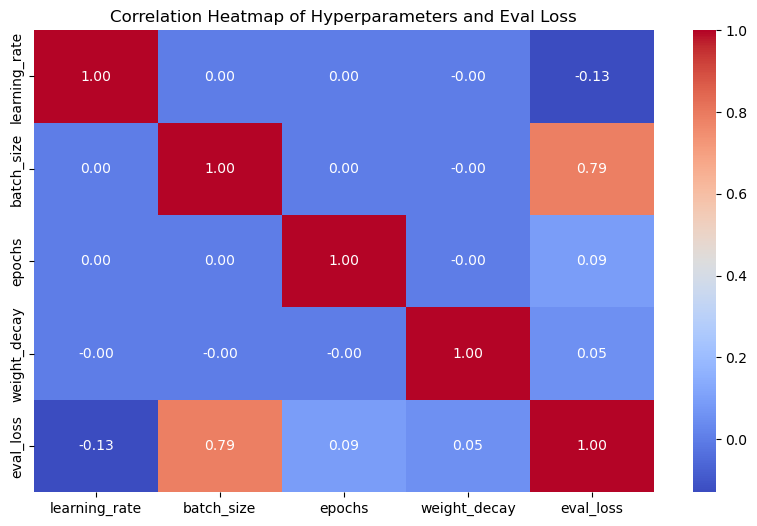

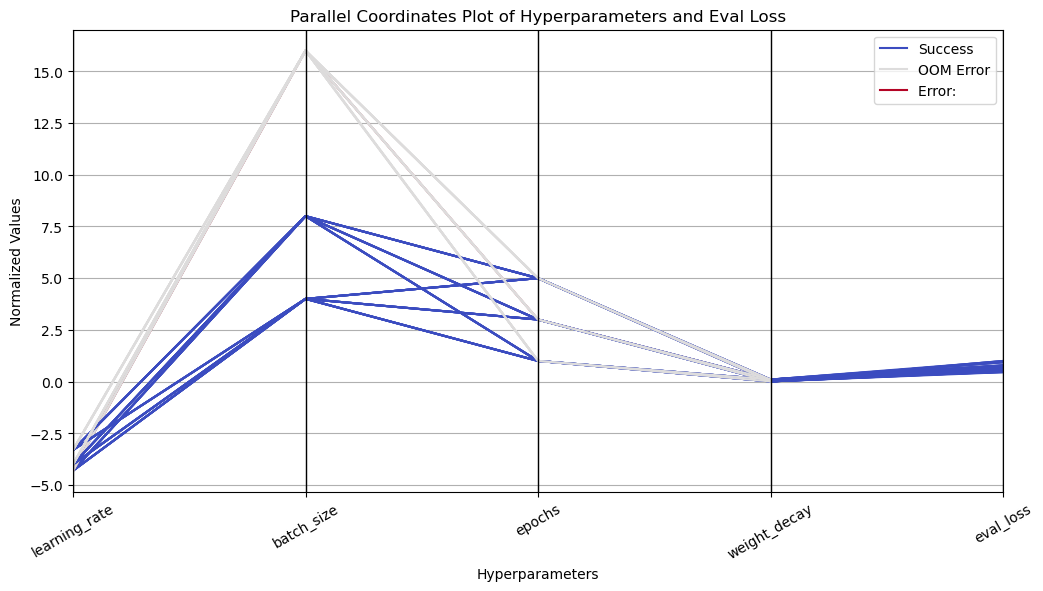

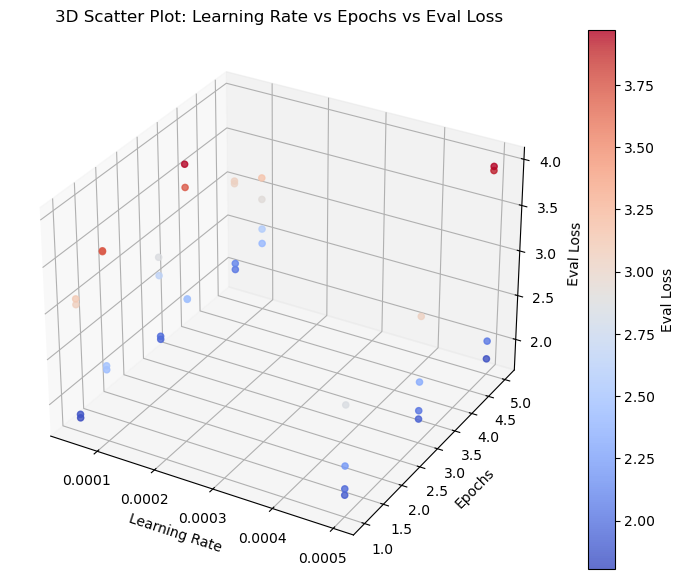

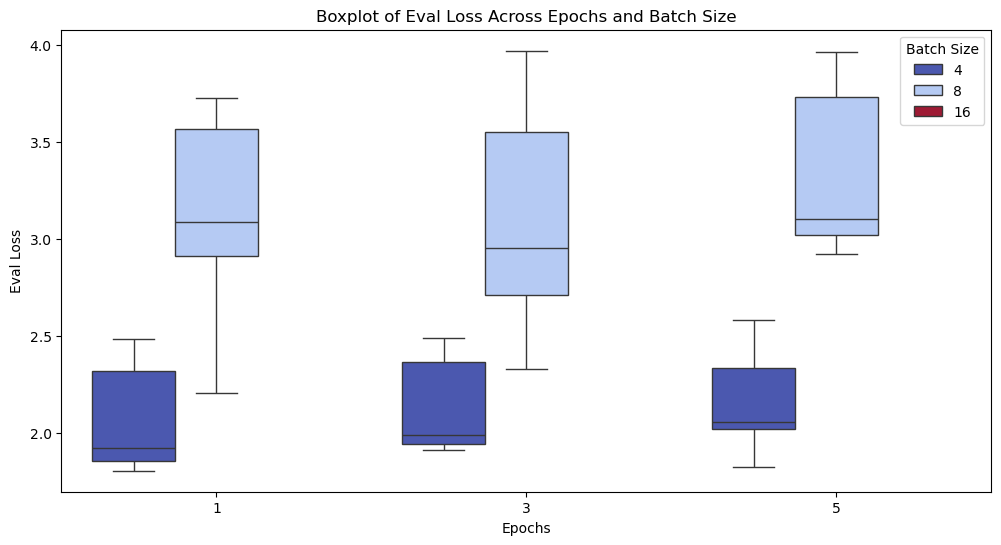

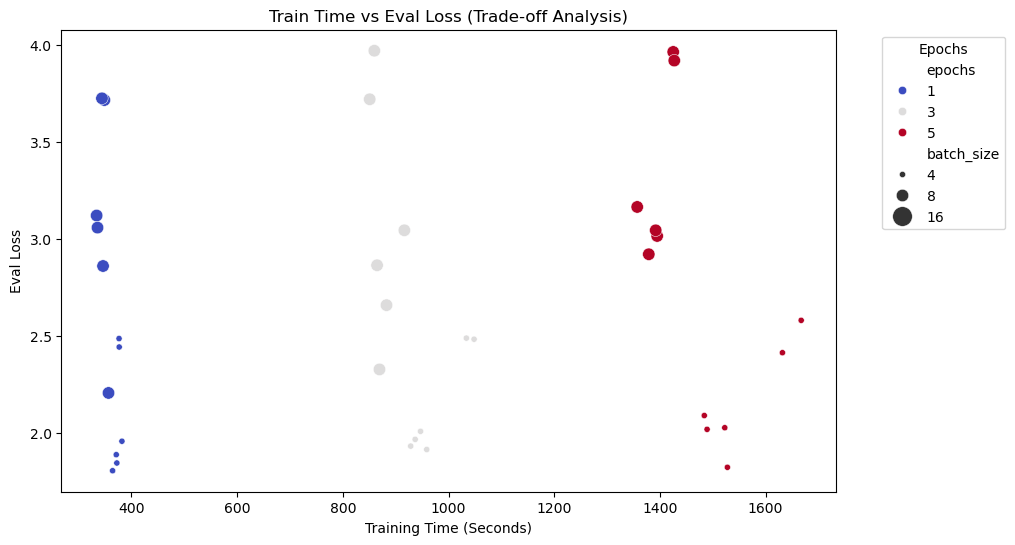

In [3]:
# 1. Heatmap: Correlation between hyperparameters and eval_loss
plt.figure(figsize=(10, 6))
corr = df[['learning_rate', 'batch_size', 'epochs', 'weight_decay', 'eval_loss']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Hyperparameters and Eval Loss")
plt.savefig("Heatmap_WithReasonings.png")
plt.show()

# 2. Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
df_normalized = df.copy()
df_normalized['learning_rate'] = np.log10(df_normalized['learning_rate'])  # Log scale for better visualization
df_normalized['eval_loss'] = df_normalized['eval_loss'] / df_normalized['eval_loss'].max()  # Normalize eval_loss
parallel_coordinates(df_normalized, 'status', cols=['learning_rate', 'batch_size', 'epochs', 'weight_decay', 'eval_loss'], colormap=plt.get_cmap("coolwarm"))
plt.title("Parallel Coordinates Plot of Hyperparameters and Eval Loss")
plt.xlabel("Hyperparameters")
plt.ylabel("Normalized Values")
plt.xticks(rotation=30)
plt.savefig("ParallelCoordinates_WithReasonings.png")
plt.show()

# 3. 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['learning_rate'], df['epochs'], df['eval_loss'], c=df['eval_loss'], cmap="coolwarm", alpha=0.8)
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Epochs")
ax.set_zlabel("Eval Loss")
ax.set_title("3D Scatter Plot: Learning Rate vs Epochs vs Eval Loss")
plt.colorbar(sc, label="Eval Loss")
plt.savefig("3DScatter_WithReasonings.png")
plt.show()

# 4. Boxplot: Distribution of eval_loss across epochs & batch_size
plt.figure(figsize=(12, 6))
sns.boxplot(x="epochs", y="eval_loss", hue="batch_size", data=df, palette="coolwarm")
plt.title("Boxplot of Eval Loss Across Epochs and Batch Size")
plt.xlabel("Epochs")
plt.ylabel("Eval Loss")
plt.legend(title="Batch Size")
plt.savefig("Boxplot_WithReasonings.png")
plt.show()

# 5. Train Time vs Eval Loss (Trade-off Analysis)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="train_time", y="eval_loss", hue="epochs", size="batch_size", palette="coolwarm", data=df, sizes=(20, 200))
plt.title("Train Time vs Eval Loss (Trade-off Analysis)")
plt.xlabel("Training Time (Seconds)")
plt.ylabel("Eval Loss")
plt.legend(title="Epochs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Trade-Off_WithReasonings.png")
plt.show()

2. Dataset without reasonings

In [4]:
# Load the dataset
file_path = "grid_search_results_WithoutReasonings.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

,model_name,learning_rate,batch_size,epochs,weight_decay,eval_loss,train_time,status,save_path
0,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,1,0.01,1.876932,384.487168,Success,trained_models_WithoutReasonings/FineLlama-3.1...
1,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,1,0.10,1.878996,366.698941,Success,trained_models_WithoutReasonings/FineLlama-3.1...
2,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,3,0.01,1.910330,928.585036,Success,trained_models_WithoutReasonings/FineLlama-3.1...
3,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,3,0.10,1.937784,932.781212,Success,trained_models_WithoutReasonings/FineLlama-3.1...
4,FineLlama-3.1-8B_instruct_eval_lr5e-05_batch4_...,0.00005,4,5,0.01,1.991047,1496.379174,Success,trained_models_WithoutReasonings/FineLlama-3.1...


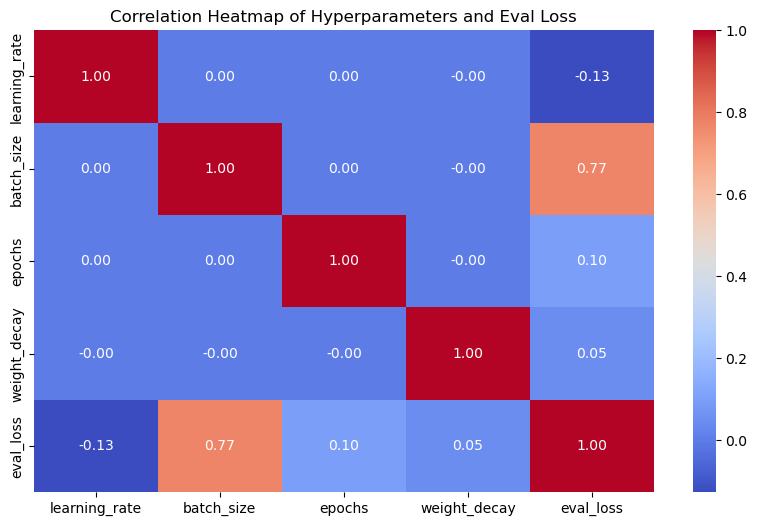

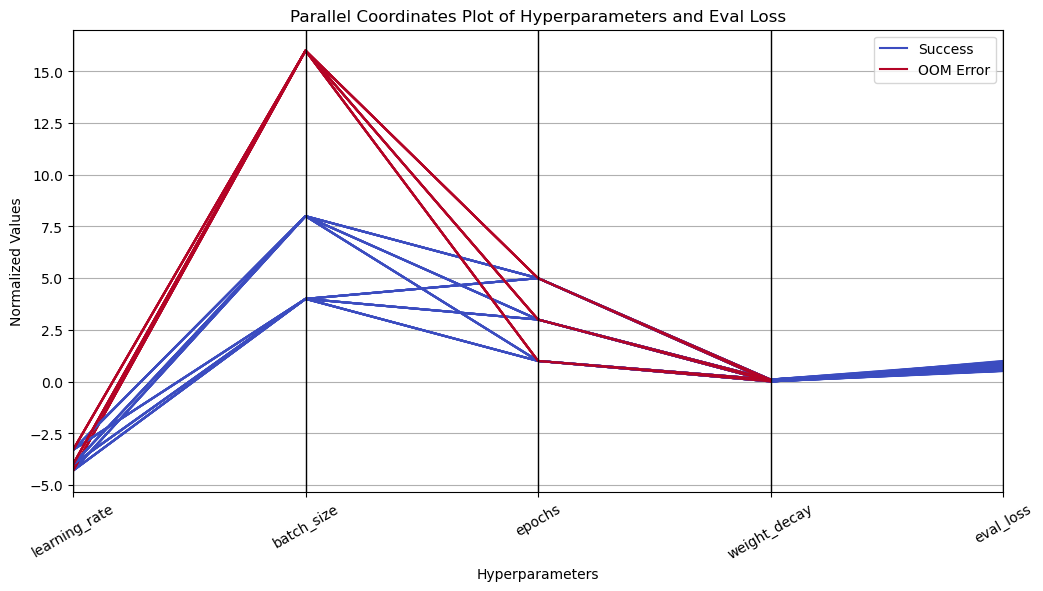

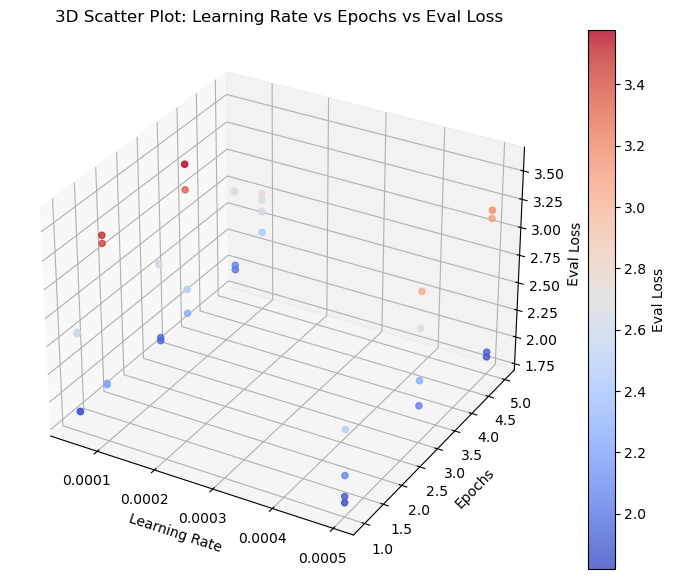

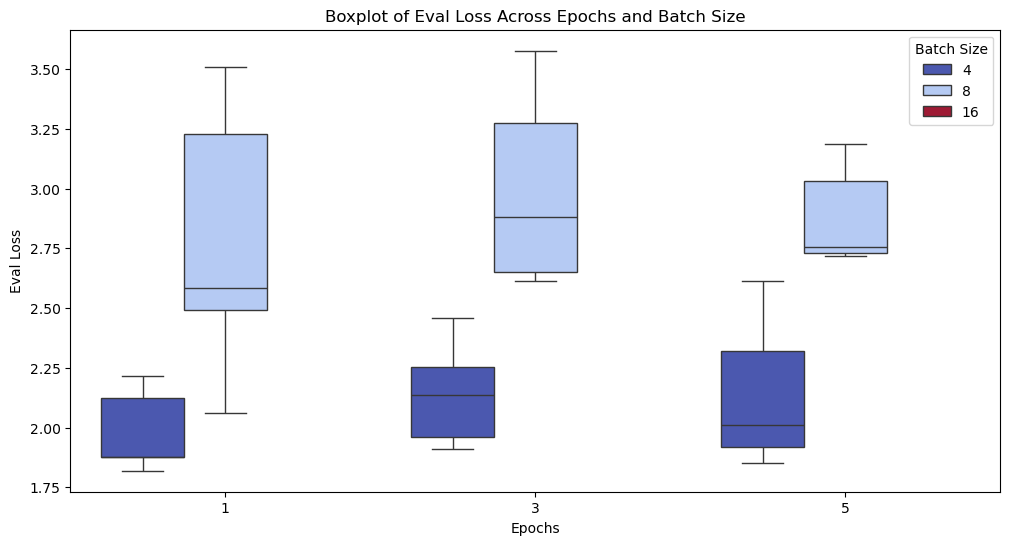

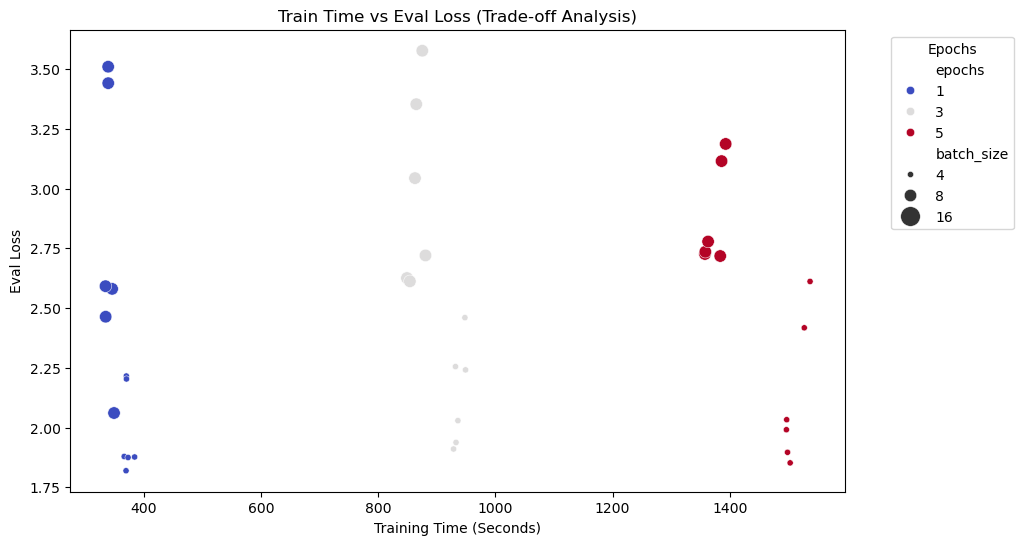

In [5]:
# 1. Heatmap: Correlation between hyperparameters and eval_loss
plt.figure(figsize=(10, 6))
corr = df[['learning_rate', 'batch_size', 'epochs', 'weight_decay', 'eval_loss']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Hyperparameters and Eval Loss")
plt.savefig("Heatmap_WithoutReasonings.png")
plt.show()

# 2. Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
df_normalized = df.copy()
df_normalized['learning_rate'] = np.log10(df_normalized['learning_rate'])  # Log scale for better visualization
df_normalized['eval_loss'] = df_normalized['eval_loss'] / df_normalized['eval_loss'].max()  # Normalize eval_loss
parallel_coordinates(df_normalized, 'status', cols=['learning_rate', 'batch_size', 'epochs', 'weight_decay', 'eval_loss'], colormap=plt.get_cmap("coolwarm"))
plt.title("Parallel Coordinates Plot of Hyperparameters and Eval Loss")
plt.xlabel("Hyperparameters")
plt.ylabel("Normalized Values")
plt.xticks(rotation=30)
plt.savefig("ParallelCoordinates_WithoutReasonings.png")
plt.show()

# 3. 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['learning_rate'], df['epochs'], df['eval_loss'], c=df['eval_loss'], cmap="coolwarm", alpha=0.8)
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Epochs")
ax.set_zlabel("Eval Loss")
ax.set_title("3D Scatter Plot: Learning Rate vs Epochs vs Eval Loss")
plt.colorbar(sc, label="Eval Loss")
plt.savefig("3DScatter_WithoutReasonings.png")
plt.show()

# 4. Boxplot: Distribution of eval_loss across epochs & batch_size
plt.figure(figsize=(12, 6))
sns.boxplot(x="epochs", y="eval_loss", hue="batch_size", data=df, palette="coolwarm")
plt.title("Boxplot of Eval Loss Across Epochs and Batch Size")
plt.xlabel("Epochs")
plt.ylabel("Eval Loss")
plt.legend(title="Batch Size")
plt.savefig("Boxplot_WithoutReasonings.png")
plt.show()

# 5. Train Time vs Eval Loss (Trade-off Analysis)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="train_time", y="eval_loss", hue="epochs", size="batch_size", palette="coolwarm", data=df, sizes=(20, 200))
plt.title("Train Time vs Eval Loss (Trade-off Analysis)")
plt.xlabel("Training Time (Seconds)")
plt.ylabel("Eval Loss")
plt.legend(title="Epochs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Trade-Off_WithoutReasonings.png")
plt.show()